In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("CO2 Emissions.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [29]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [30]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [31]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

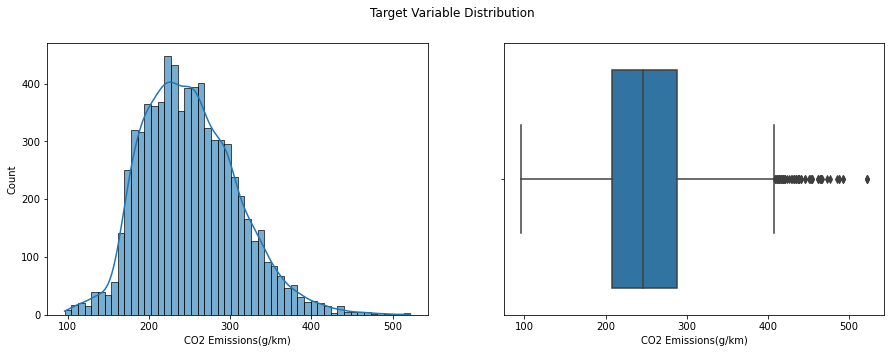

In [32]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.histplot(df['CO2 Emissions(g/km)'], kde=True, alpha=0.6, ax=ax0)
sns.boxplot(df['CO2 Emissions(g/km)'], ax=ax1)

plt.suptitle('Target Variable Distribution')
plt.show()


In [33]:
numerical_cols = df.select_dtypes(exclude='object')

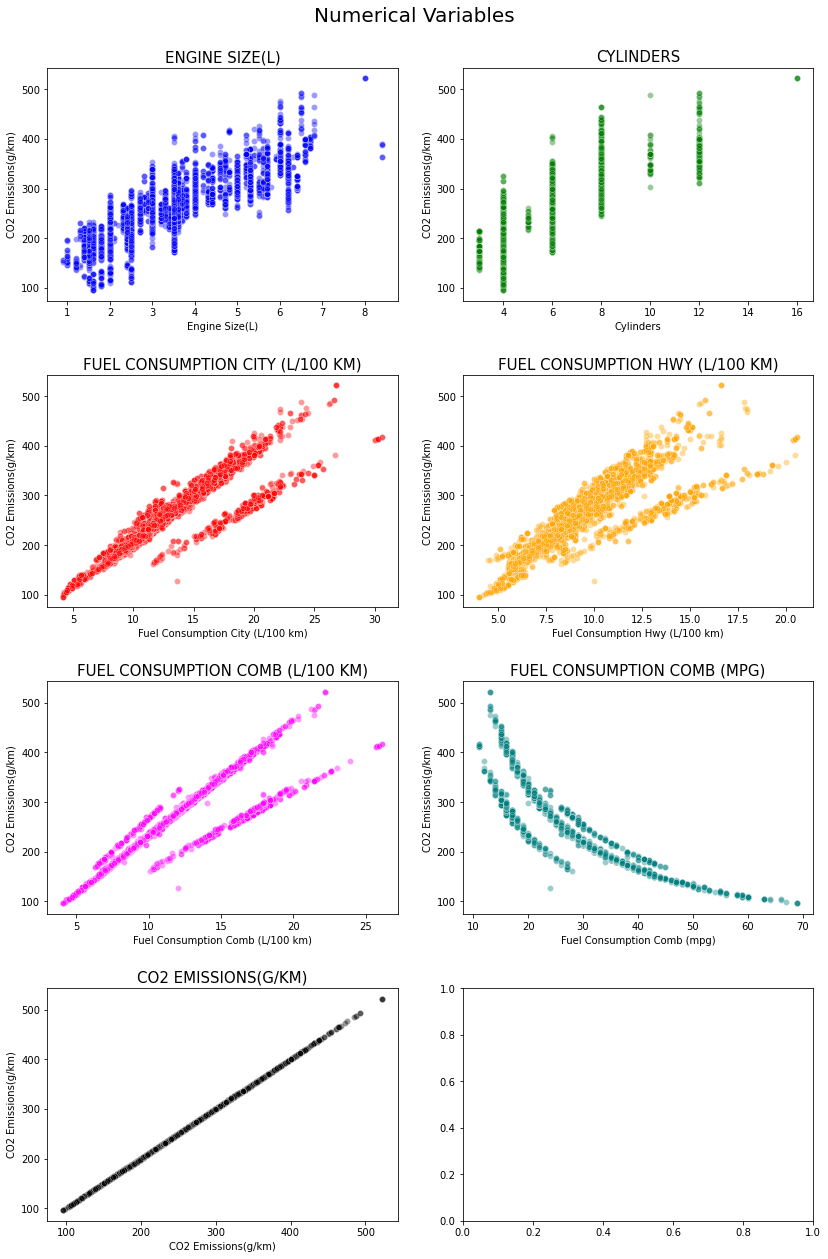

In [34]:
colors = ['blue', 'green', 'red', 'orange', 'magenta', 'teal', 'black']


fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(numerical_cols):
        sns.scatterplot(x=col, y='CO2 Emissions(g/km)', data=df, color=colors[i], ax=axes[i], alpha=0.4)
        axes[i].set_title(col.upper(), fontsize=15)
    else:
        fig.delaxes(axes[i])
    
plt.suptitle('Numerical Variables', fontsize=20)
plt.tight_layout(pad=2.5)
plt.show()

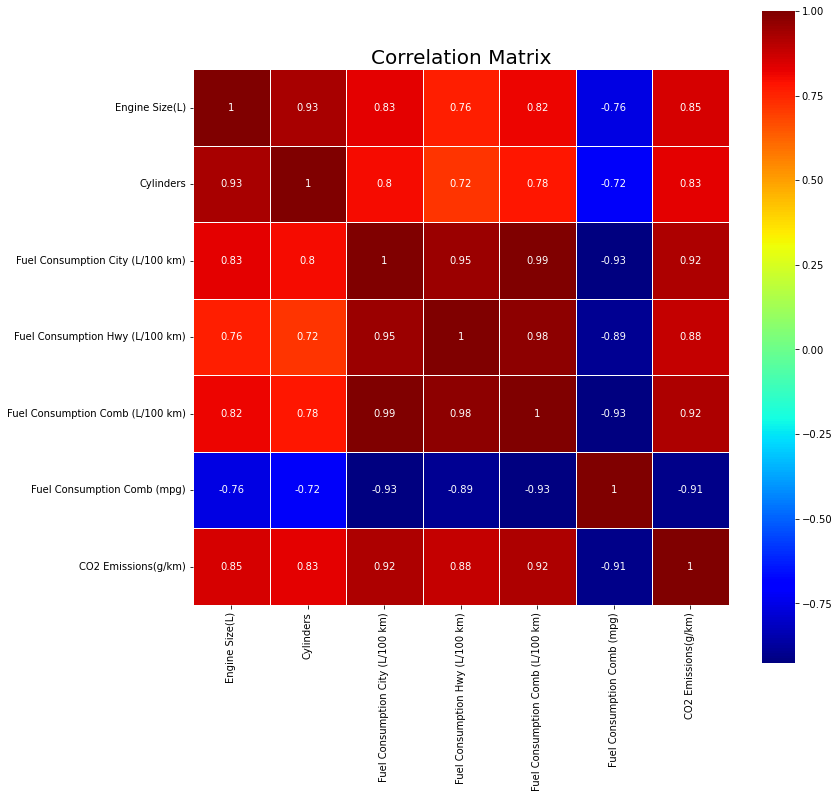

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix,annot=True, linewidth=.7, cmap='jet', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [39]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

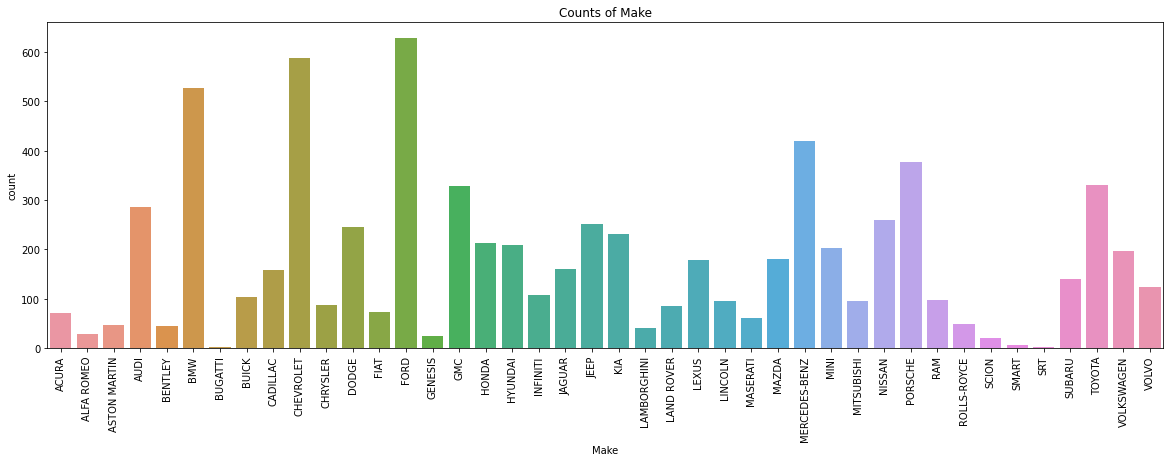

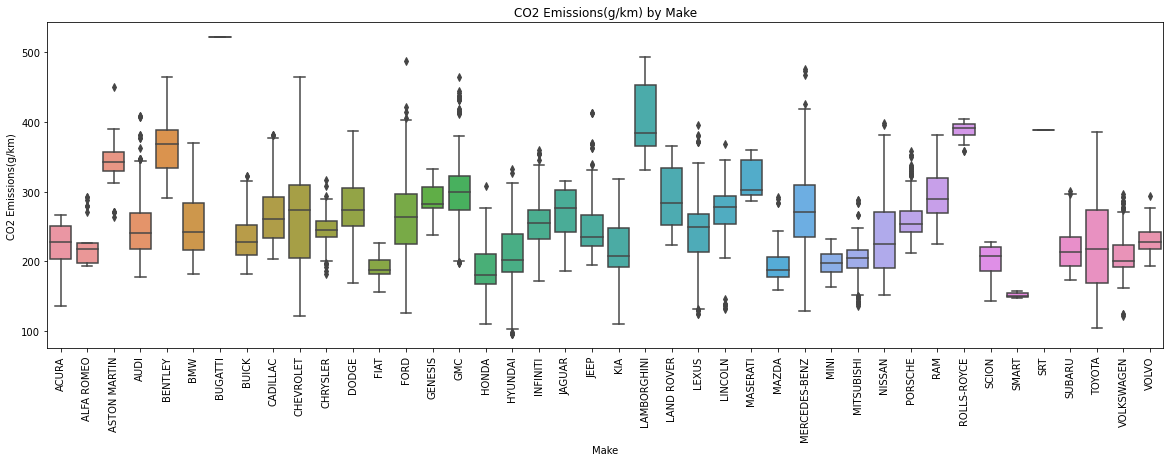

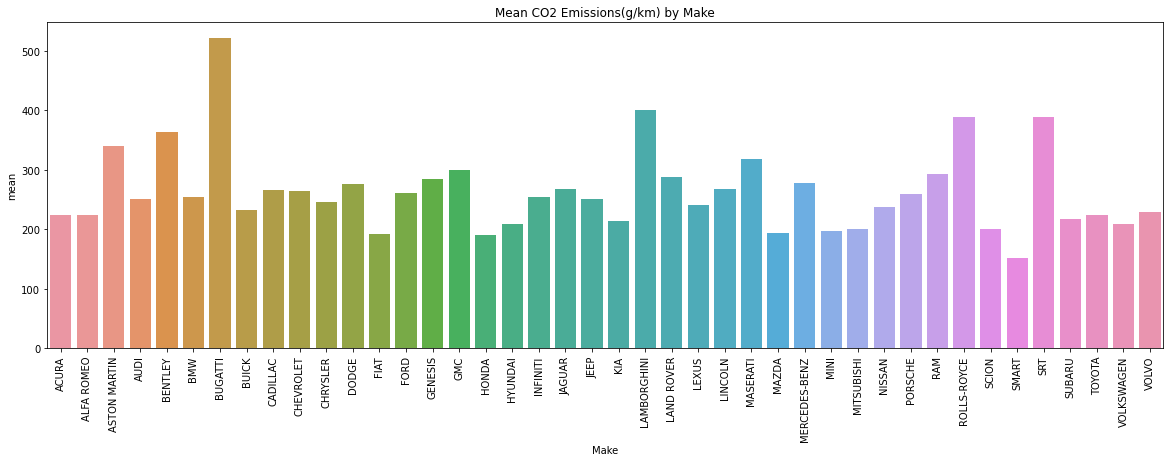

Summary statistics for Make:
               count        mean  median        std
Make                                               
ACURA             72  223.652778   228.0  28.390218
ALFA ROMEO        30  224.900000   217.0  34.448713
ASTON MARTIN      47  339.617021   343.0  33.445968
AUDI             286  250.846154   241.0  45.633215
BENTLEY           46  362.934783   369.0  39.630181
BMW              527  254.007590   242.0  44.236746
BUGATTI            3  522.000000   522.0   0.000000
BUICK            103  233.058252   228.0  32.616255
CADILLAC         158  265.854430   260.0  40.758701
CHEVROLET        588  264.346939   274.0  64.862838
CHRYSLER          88  246.170455   244.5  25.219597
DODGE            246  276.361789   274.0  45.323004
FIAT              73  192.246575   187.0  17.315520
FORD             628  260.988854   263.0  54.349230
GENESIS           25  284.840000   282.0  23.152898
GMC              328  299.917683   299.0  47.665398
HONDA            214  190.219626   

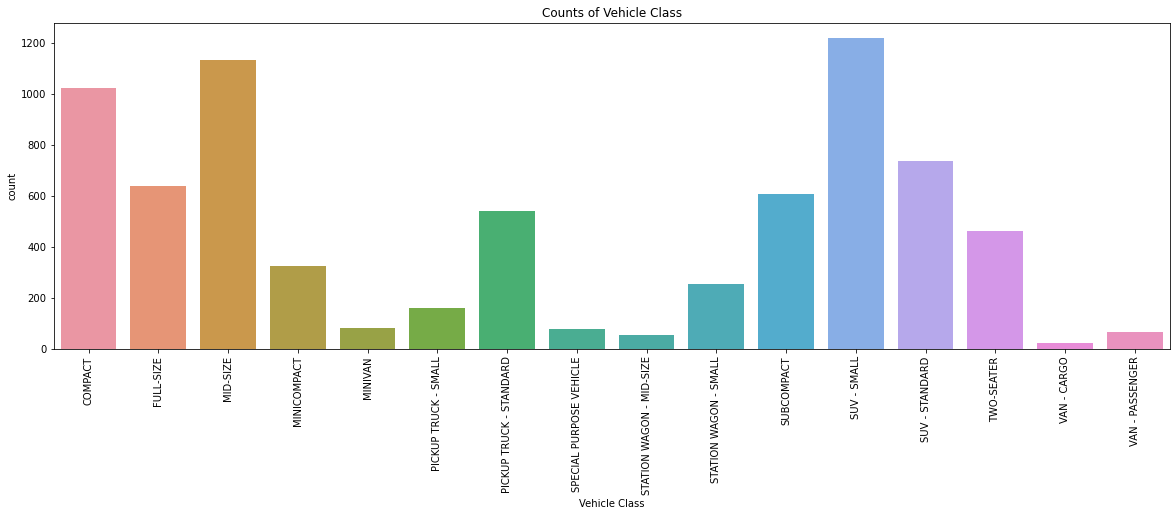

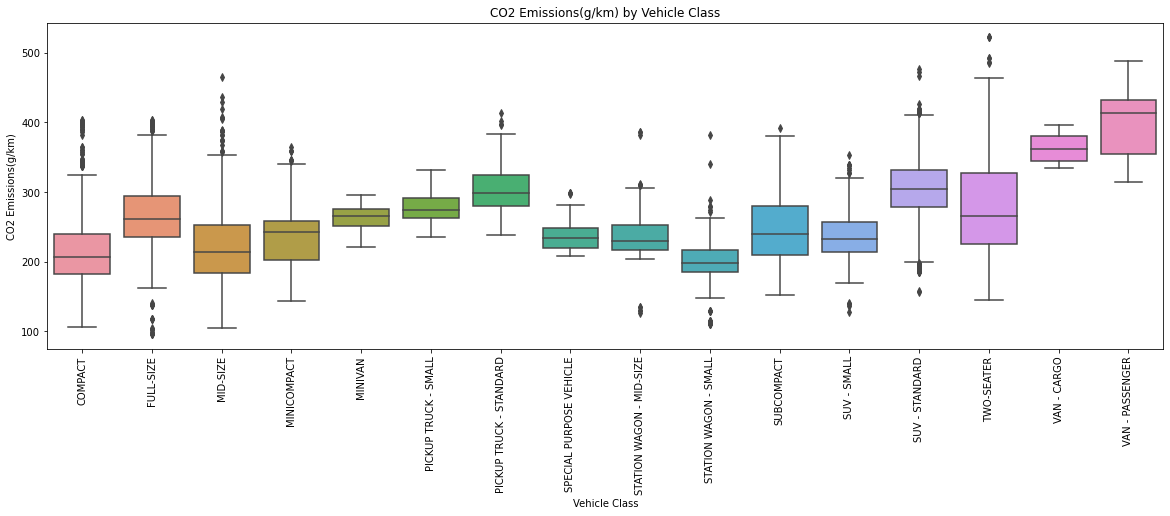

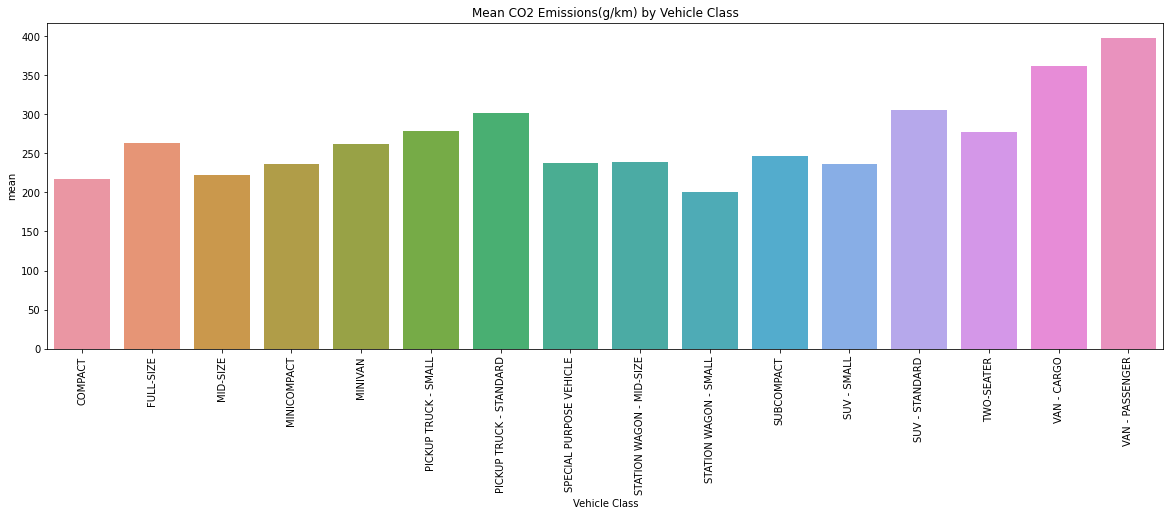

Summary statistics for Vehicle Class:
                          count        mean  median        std
Vehicle Class                                                 
COMPACT                    1022  216.679061   206.5  50.443913
FULL-SIZE                   639  263.316119   261.0  55.054891
MID-SIZE                   1133  222.455428   214.0  55.602443
MINICOMPACT                 326  236.607362   242.0  40.971650
MINIVAN                      80  262.312500   265.5  17.744740
PICKUP TRUCK - SMALL        159  278.968553   274.0  22.891439
PICKUP TRUCK - STANDARD     538  301.513011   298.0  30.477161
SPECIAL PURPOSE VEHICLE      77  237.597403   234.0  21.961845
STATION WAGON - MID-SIZE     53  238.698113   230.0  56.414532
STATION WAGON - SMALL       252  200.067460   198.0  33.410274
SUBCOMPACT                  606  246.448845   239.0  49.772772
SUV - SMALL                1217  236.292523   233.0  31.217718
SUV - STANDARD              735  304.836735   305.0  44.356378
TWO-SEATER       

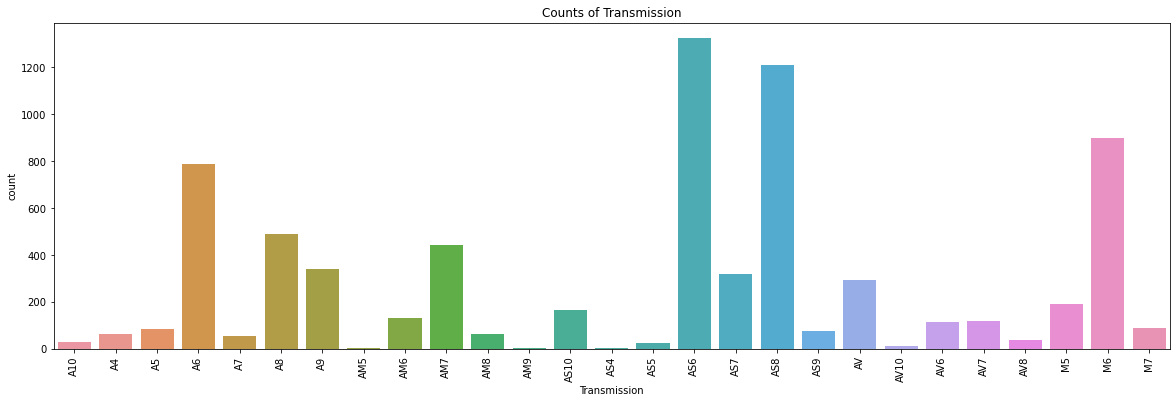

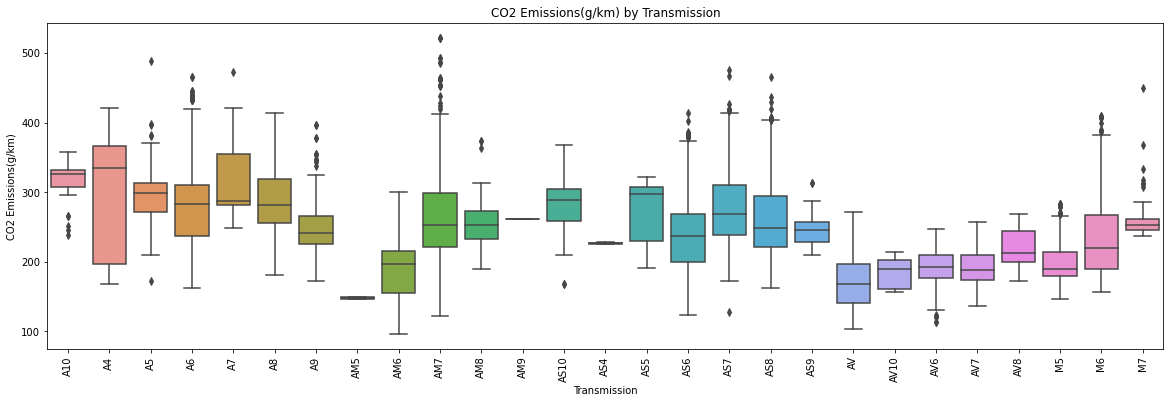

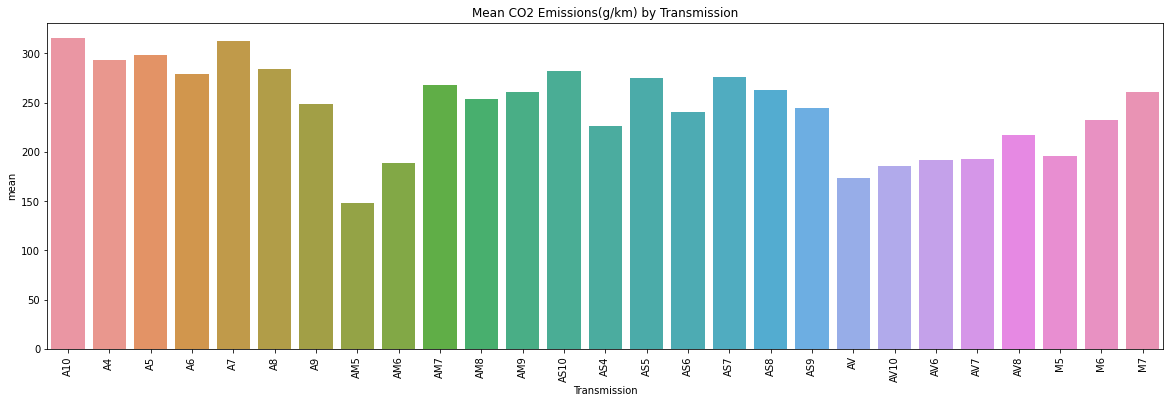

Summary statistics for Transmission:
              count        mean  median        std
Transmission                                      
A10              31  315.161290   326.0  30.735535
A4               65  292.953846   334.0  83.017963
A5               84  298.630952   299.0  41.339843
A6              789  279.059569   283.0  56.022342
A7               53  312.716981   287.0  51.011453
A8              490  283.908163   281.0  42.158501
A9              339  248.123894   241.0  35.642488
AM5               4  148.500000   148.5   1.732051
AM6             132  188.159091   197.0  49.817197
AM7             445  268.276404   253.0  67.985508
AM8              62  253.661290   253.0  40.878045
AM9               3  261.000000   261.0   0.000000
AS10            168  281.958333   288.0  35.898952
AS4               2  226.500000   226.5   2.121320
AS5              26  275.115385   297.0  42.318154
AS6            1324  240.172961   237.0  49.754966
AS7             319  276.106583   269.0  57.2

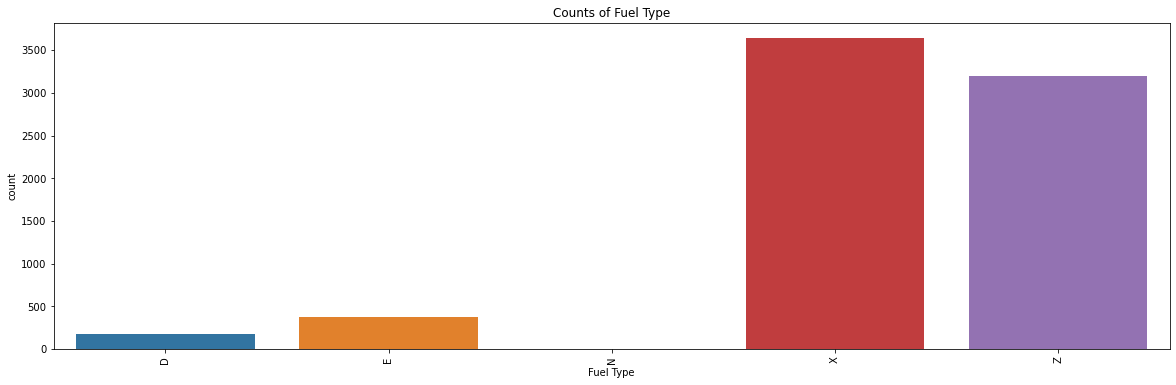

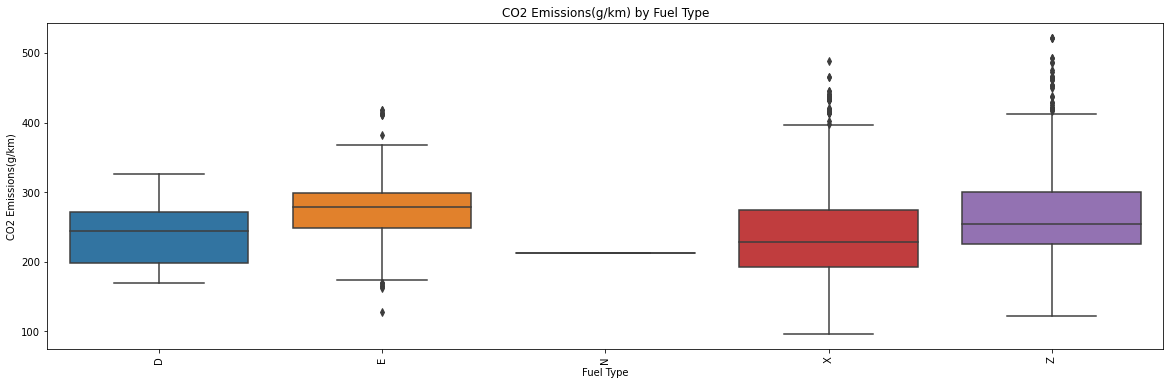

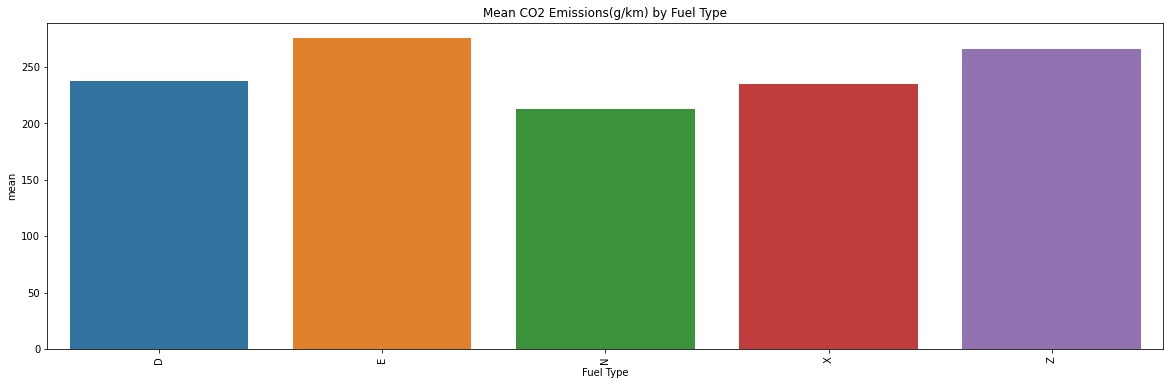

Summary statistics for Fuel Type:
           count        mean  median        std
Fuel Type                                      
D            175  237.548571   245.0  41.817704
E            370  275.091892   279.0  47.093198
N              1  213.000000   213.0        NaN
X           3637  235.119329   228.0  57.401473
Z           3202  266.043410   255.0  56.695972



In [40]:
categorical_cols.remove('Model') # separate the model column since it has too many unique values and is difficult to plot
target_col = 'CO2 Emissions(g/km)'

for col in categorical_cols:
    summary_stats = df.groupby(col)[target_col].agg(['count', 'mean', 'median', 'std'])

    plt.figure(figsize=(20, 6))
    sns.countplot(x=col, data=df, order=summary_stats.index)
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(20, 6))
    sns.boxplot(x=col, y=target_col, data=df, order=summary_stats.index)
    plt.title(f'{target_col} by {col}')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(20, 6))
    sns.barplot(x=summary_stats.index, y='mean', data=summary_stats)
    plt.title(f'Mean {target_col} by {col}')
    plt.xticks(rotation=90)
    plt.show()

    # Print summary statistics
    print(f"Summary statistics for {col}:\n{summary_stats}\n")


In [25]:
one_hot_encoded_df = pd.get_dummies(df)

In [9]:
one_hot_encoded_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Get X and y

X = one_hot_encoded_df.drop(columns='CO2 Emissions(g/km)').values
y = one_hot_encoded_df['CO2 Emissions(g/km)'].values

In [11]:
import warnings
warnings.simplefilter("ignore")

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the hyperparameter grid for GridSearchCV for each regressor
param_grid_gbr = {
    'max_depth': range(1, 6),
    'n_estimators': range(50, 101, 10),
    'max_features': ['sqrt'],
    'random_state': [42],
    'warm_start': [True]
}

param_grid_rfr = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt'],
    'random_state': [42]
}

param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Initialize GridSearchCV for each regressor
grid_gbr = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid=param_grid_gbr,
    n_jobs=-1,
    cv=2,
    verbose=1
)

grid_rfr = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid_rfr,
    n_jobs=-1,
    cv=2,
    verbose=1
)

grid_lr = GridSearchCV(
    LinearRegression(),
    param_grid=param_grid_lr,
    n_jobs=-1,
    cv=2,
    verbose=1
)

# Fit each regressor on the training data
grid_gbr.fit(X_train, y_train)
grid_rfr.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# Find the best regressor with the highest cross-validated score
best_regressor = None
if grid_gbr.best_score_ >= grid_rfr.best_score_ and grid_gbr.best_score_ >= grid_lr.best_score_:
    best_regressor = grid_gbr
elif grid_rfr.best_score_ >= grid_gbr.best_score_ and grid_rfr.best_score_ >= grid_lr.best_score_:
    best_regressor = grid_rfr
else:
    best_regressor = grid_lr

# Print the cross-validated score and best hyperparameters of the best regressor
print('Best Regressor CV Score: {:.4f}'.format(best_regressor.best_score_))
print('Best Regressor Best params:\n{}'.format(best_regressor.best_params_))

# Get the best predictions on the test set from the best regressor
best_predictions = best_regressor.predict(X_test)

# Print the R-squared score of the best regressor on the test set
print('Best Regressor Test score (R-squared): {:.4f}'.format(best_regressor.score(X_test, y_test)))


Fitting 2 folds for each of 30 candidates, totalling 60 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Regressor CV Score: 0.9874
Best Regressor Best params:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150, 'random_state': 42}
Best Regressor Test score (R-squared): 0.9935


In [14]:
best_regressor

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20], 'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             verbose=1)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the best regressor
best_predictions = best_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, best_predictions)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, best_predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE): {:.4f}'.format(mse))
print('R-squared (R2) Score: {:.4f}'.format(r2))


Mean Squared Error (MSE): 22.0677
R-squared (R2) Score: 0.9935
